                  y             x    y_adjusted
count  1.048576e+07  1.048576e+07  1.048576e+07
mean   4.424662e+04  5.242880e+07  2.250729e+03
std    6.811289e+05  3.026978e+07  3.406638e+04
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  2.621440e+07  0.000000e+00
50%    0.000000e+00  5.242880e+07  0.000000e+00
75%    0.000000e+00  7.864319e+07  0.000000e+00
max    1.738433e+07  1.048576e+08  8.692166e+05


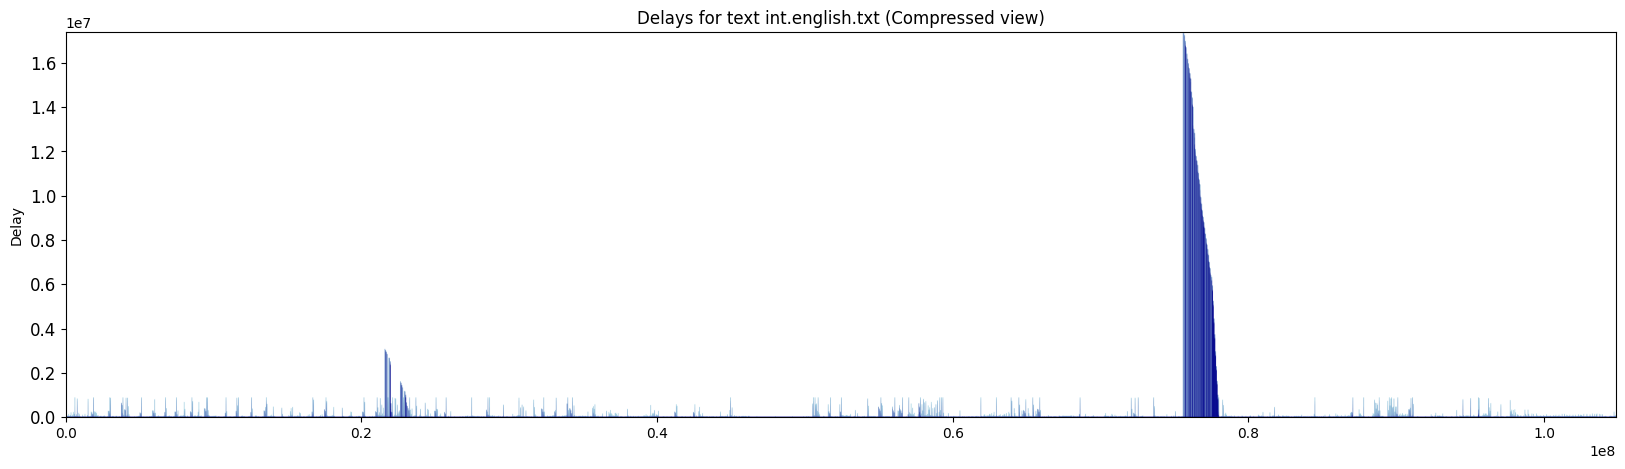

In [18]:
import polars as pl
import datashader as ds
import datashader.transfer_functions as tf
import matplotlib.pyplot as plt

file = 'english'

# Leggi il file con Polars, specificando il tipo di dati per la colonna
df = pl.read_csv(f'delays_txt/{file}_delays.txt', has_header=False, dtypes={"column_1": pl.Float64})
df = df.rename({'column_1': 'y'})

# Aggiungi la colonna 'x'
df = df.with_columns([
    pl.Series(name='x', values=range(len(df)))
])

step = 10 
df_reduced = df[::step]

threshold = df_reduced['y'].mean()

df_reduced = df_reduced.with_columns([
    pl.when(df_reduced['y'] > threshold).then(df_reduced['y'] / 20).otherwise(df_reduced['y']).alias('y_adjusted')
])

df_pandas = df_reduced.to_pandas()

print(df_pandas.describe())

canvas = ds.Canvas(plot_width=2000, plot_height=1000)
agg = canvas.line(df_pandas, 'x', 'y_adjusted', ds.count())

img = tf.shade(agg)
img = tf.set_background(img, "white").to_pil()

plt.figure(figsize=(20, 5))
plt.imshow(img, aspect='auto', extent=(0, len(df) - 1, df['y'].min(), df['y'].max()), origin='upper')
plt.ylim(df['y'].min(), df['y'].max())

plt.savefig(f'delays_png/{file}_delays_std.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

                  y    y_adjusted             x
count  1.048576e+07  1.048576e+07  1.048576e+07
mean   2.179834e+00  2.179834e+00  5.242880e+07
std    2.851252e+01  2.851252e+01  3.026978e+07
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  2.621440e+07
50%    0.000000e+00  0.000000e+00  5.242880e+07
75%    0.000000e+00  0.000000e+00  7.864319e+07
max    2.741300e+04  2.741300e+04  1.048576e+08


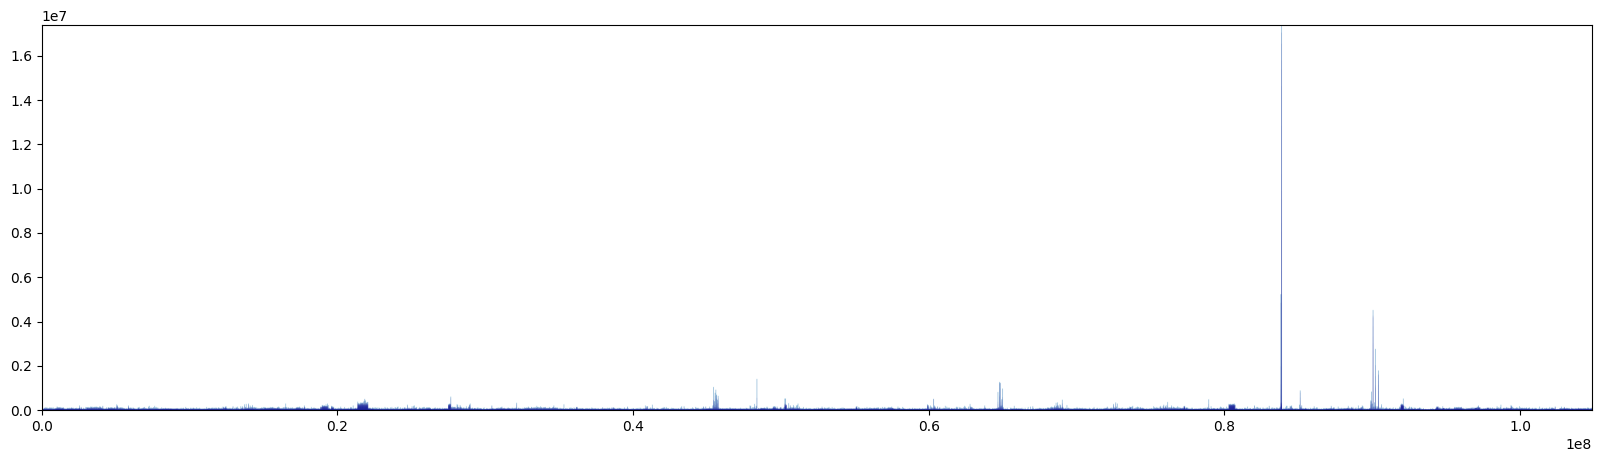

In [1]:
import polars as pl
import datashader as ds
import datashader.transfer_functions as tf
import matplotlib.pyplot as plt

file = 'english'

# Leggi il primo file con Polars
df1 = pl.read_csv(f'delays_txt/{file}_delays.txt', has_header=False, dtypes={"column_1": pl.Float64})
df1 = df1.rename({'column_1': 'y'})

# Calcola il valore massimo e minimo della colonna 'y' del primo dataset
y_min1 = df1['y'].min()
y_max1 = df1['y'].max()

# Aggiungi la colonna 'x' al primo DataFrame
df1 = df1.with_columns([
    pl.Series(name='x', values=range(len(df1)))
])

# Riduci il primo DataFrame
step = 10
df_reduced1 = df1[::step]

# Calcola la media per il ridotto DataFrame 1
threshold1 = df_reduced1['y'].mean()

# Ridimensiona i valori della colonna 'y' del primo DataFrame
df_reduced1 = df_reduced1.with_columns([
    pl.when(df_reduced1['y'] > threshold1).then(df_reduced1['y'] / 20).otherwise(df_reduced1['y']).alias('y_adjusted')
])

# Leggi il secondo file con Polars
file2 = 'dblp'
df2 = pl.read_csv(f'delays_txt/{file2}_delays.txt', has_header=False, dtypes={"column_1": pl.Float64})
df2 = df2.rename({'column_1': 'y'})

# Calcola il valore massimo e minimo della colonna 'y' del secondo dataset
y_min2 = df2['y'].min()
y_max2 = df2['y'].max()

# Ridimensiona i valori della colonna 'y' del secondo DataFrame utilizzando la scala del primo DataFrame
df2 = df2.with_columns([
    pl.when(df2['y'] > threshold1).then(df2['y'] / 20).otherwise(df2['y']).alias('y_adjusted')
])

# Aggiungi la colonna 'x' al secondo DataFrame
df2 = df2.with_columns([
    pl.Series(name='x', values=range(len(df2)))
])

# Riduci il secondo DataFrame
df_reduced2 = df2[::step]

# Conversione a DataFrame Pandas per l'uso con Datashader
df_pandas2 = df_reduced2.to_pandas()

# Descrizione del DataFrame ridotto (opzionale)
print(df_pandas2.describe())

canvas = ds.Canvas(plot_width=2000, plot_height=1000)
agg = canvas.line(df_pandas2, 'x', 'y_adjusted', ds.count())

img = tf.shade(agg)
img = tf.set_background(img, "white").to_pil()

plt.figure(figsize=(20, 5))
# Usa gli estremi della scala del primo dataset per mantenere la stessa scala delle y
plt.imshow(img, aspect='auto', extent=(0, len(df2) - 1, y_min1, y_max1), origin='upper')
plt.ylim(y_min1, y_max1)

plt.savefig(f'delays_png/{file2}_delays_std.png', bbox_inches='tight', pad_inches=0.1)
plt.show()
